### **Introduction**

The video game industry has experienced a tremendous growth and evolution over the past several decades, expanding from a niche entertainment practice into a **multi-billion-dollar global industry**. As new technologies, platforms, and gaming experiences evolve, video games have emerged as one of the most consumed and utilized sources of media globally. From **console and PC to mobile and virtual reality**, the industry is evolving and expanding with the market becoming increasingly diversified in its appeal and attracting millions of players from varied demographics.

In an ever-shifting gaming industry, knowing about significant trends and what players like is essential both for **developers and business** in gaming. By this analysis, we aim to study and provide insights into the video game world by tracking some of the most important metrics that reflect **consumer behavior and game performance** over the years. By comparing **highly-rated genres, top-selling games, user reviews, and sales figures**, we discover helpful trends that can guide strategic decisions in game development, marketing, and investment.

Our research puts the impact of such factors as user ratings, ratings count, and game genre popularity at center stage and shows a wide outlook of what determines success in the gaming industry. Determining top-performing games and genres, businesses can know what performs the best for the gamers and design their products in accordance with what the **market needs**.

This report is aimed at providing actionable information to **stakeholders** in the **gaming sector**, from game makers to marketing teams, so they can learn how to navigate competition and make sane decisions in a **ever-evolving marketplace**. This examination is geared toward consumer interaction, gameplay quality, and market need, delivering more insight into the factors causing the success of video games throughout the world.

### **Importing Libraries**

#### **1. Imported Libraries:**
- `pandas` → Data manipulation and analysis.
- `seaborn`, `matplotlib.pyplot` → Data visualization.
- `numpy` → Numerical computations.
- `xgboost` → Extreme Gradient Boosting (XGBoost) for machine learning.
- `warnings` → Warnings suppression.

#### **2. Data Preprocessing:**
- `LabelEncoder` → Converts categorical variables to numerical form.
- `StandardScaler` → Scales numeric features by normalizing them.
- `OneHotEncoder` → Converts category variables into binary vectors.
- `train_test_split` → Splits the dataset into training and test sets.

#### **3. Machine Learning Models:**
- `RandomForestClassifier` → Classification using an ensemble of decision trees.
- `RandomForestRegressor` → Regression using random forests.
- `LinearRegression` → Simple linear regression model for predictive analysis.
- `xgboost.XGBClassifier` (used but not directly referenced) → An optimized gradient boosting algorithm.
- `KMeans` → An unsupervised learning clustering algorithm.

#### **4. Model Evaluation Metrics:**
- `mean_absolute_error` → The prediction error is estimated in regression.
- `accuracy_score` → Classification accuracy is measured.
- `confusion_matrix` → Models performance is classified.
- `classification_report` → Provides precision, recall, and F1-score for classifying models.

#### **5. Dimensionality Reduction:**
- `PCA` (Principal Component Analysis) → Diminishing dimension while preserving variance.

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

### **Load Dataset and Initial Inspection**

#### **1. Load Dataset:**
- `df = pd.read_csv('all_video_games.csv')`
  - Loads the dataset named **"all_video_games.csv"** into a **pandas DataFrame** (`df`).
  - The dataset likely contains information about various video games, such as titles, genres, ratings, platforms, developers, publishers, and sales.

#### **2. Inspect the Dataset:**
- `df.head()`
  - Displays the **first five rows** of the data to provide a quick overview.
  - Helps in comprehending the data structure, column names, and data types.

In [105]:
# Load Dataset
df = pd.read_csv('all_video_games.csv')

# Inspect the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                           Title Release Date                    Developer  \
0                Ziggurat (2012)    2/17/2012  Action Button Entertainment   
1                      4X4 EVO 2   11/15/2001             Terminal Reality   
2                MotoGP 2 (2001)    1/22/2002                        Namco   
3                       Gothic 3   11/14/2006                Piranha Bytes   
4  Siege Survival: Gloria Victis    5/18/2021               FishTankStudio   

         Publisher           Genres        Product Rating  User Score  \
0     Freshuu Inc.           Action                   NaN         6.9   
1        Gathering  Auto Racing Sim  Rated E For Everyone         NaN   
2            Namco  Auto Racing Sim  Rated E For Everyone         5.8   
3            Aspyr      Western RPG      Rated T For Teen         7.5   
4  Black Eye Games              RPG                   NaN         6.5   

   User Ratings Count                                     Pla

### **Convert Release Date to DateTime and Extract Year**

Reads the **Release Date** column of a dataset and parses it into **datetime format** while extracting the **release year** of each video game. The `pd.to_datetime()` function properly formats dates, and error handling is performed by coercing invalid values to `NaT` (Not a Time). When converted, the `dt.year` attribute is used to extract the **year** of each date and put it in a new column called **Release Year**. Finally, the first rows of the dataset are printed to verify the transformation was a success. This step is crucial in the analysis of video game release patterns over time. 

In [106]:
# Convert Release Date to datetime and extract the year
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Release Year'] = df['Release Date'].dt.year

# Print out the 'Release Year' to verify the conversion
print("\nAfter extracting 'Release Year':")
print(df[['Release Date', 'Release Year']].head())



After extracting 'Release Year':
  Release Date  Release Year
0   2012-02-17        2012.0
1   2001-11-15        2001.0
2   2002-01-22        2002.0
3   2006-11-14        2006.0
4   2021-05-18        2021.0


### **Handle Missing Values**

Handles **missing values** in the data set to ensure data quality for analysis. It **drops rows** where important columns—**'User Score'** and **'User Ratings Count'**—contain missing values, as these are necessary to determine game popularity and performance. Missing values in the **'Product Rating'** column are replaced with the **mode** (most frequent value), ensuring consistency without losing much data. Finally, the code prints the number of missing values across all columns to verify the required preprocessing steps have been carried out effectively. This verifies data integrity for accurate insights.

In [107]:
# Handle missing values:
# Drop rows with missing values in critical columns like 'User Score' and 'User Ratings Count'
df.dropna(subset=['User Score', 'User Ratings Count'], inplace=True)

# Fill missing 'Product Rating' with mode (most frequent value)
df['Product Rating'].fillna(df['Product Rating'].mode()[0], inplace=True)

# Check if any missing values are left in the dataset
print("\nMissing values after preprocessing:")
print(df.isnull().sum())



Missing values after preprocessing:
Title                  0
Release Date           0
Developer             46
Publisher             46
Genres                 0
Product Rating         0
User Score             0
User Ratings Count     0
Platforms Info         0
Release Year           0
dtype: int64


C:\Users\monis\AppData\Local\Temp\ipykernel_29068\769825216.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Rating'].fillna(df['Product Rating'].mode()[0], inplace=True)


### **Encode Categorical Features**

Applies **Label Encoding** to categorical data columns of the dataset without dropping the original 'Genres' column. It first initializes a `LabelEncoder` and inserts a new column **'Genres Label'**, containing numerical values of the 'Genres' column along with the original values. Then, it applies **Label Encoding** to 'Developer', 'Publisher', and 'Platforms Info' columns and converts categorical information into numerical data for machine learning models. Finally, it verifies the conversion by displaying the first rows of the converted dataset to ensure the encoding process was successful. 

In [108]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a new column for label-encoded Genres while keeping the original
df['Genres Label'] = label_encoder.fit_transform(df['Genres'])

# Encode other categorical columns
df['Developer'] = label_encoder.fit_transform(df['Developer'])
df['Publisher'] = label_encoder.fit_transform(df['Publisher'])
df['Platforms Info'] = label_encoder.fit_transform(df['Platforms Info'])

# Ensure categorical columns exist
categorical_cols = ['Genres Label', 'Developer', 'Publisher', 'Platforms Info']

# Print out the first few rows to check the encoding
print("\nAfter encoding categorical columns:")
print(df[['Genres', 'Genres Label', 'Developer', 'Publisher', 'Platforms Info']].head())


After encoding categorical columns:
                  Genres  Genres Label  Developer  Publisher  Platforms Info
0                 Action             7         98        605            9890
3            Western RPG           116       2315        122            2318
4                    RPG            71       1071        201            2669
5                 Rhythm            77       2064       1330            8203
7  Vertical Shoot-'Em-Up           110          2          3            6625


Applies **One-Hot Encoding** to categorical variables, which are transformed into binary (0 or 1) columns and avoid multicollinearity by dropping the first category from each one. After encoding, the dataset is split into **features (X)** and a randomly generated **binary target variable (y)** for classification. A **train-test split** (80-20) is performed to set up `X_train`, `X_test`, `y_train`, and `y_test`. Debugging steps print column names before and after encoding to verify transformations. Lastly, `X_train` and `X_test` are assigned to match in order to have the same feature columns, using **0** to fill missing values as necessary.

In [109]:
# One-Hot Encode Categorical Features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define Features (X) and Target Variable (y)
X = df_encoded
y = np.random.randint(0, 2, len(df))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if columns exist
print("Before Encoding, X_train Columns:", X_train.columns)

# After Encoding
print("After Encoding, X_train Columns:", X_train.columns)

# Ensure both datasets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("Final Columns in X_train:", X_train.columns)
print("Final Columns in X_test:", X_test.columns)

Before Encoding, X_train Columns: Index(['Title', 'Release Date', 'Genres', 'Product Rating', 'User Score',
       'User Ratings Count', 'Release Year', 'Genres Label_1',
       'Genres Label_2', 'Genres Label_3',
       ...
       'Platforms Info_10110', 'Platforms Info_10111', 'Platforms Info_10112',
       'Platforms Info_10113', 'Platforms Info_10114', 'Platforms Info_10115',
       'Platforms Info_10116', 'Platforms Info_10117', 'Platforms Info_10118',
       'Platforms Info_10119'],
      dtype='object', length=15753)
After Encoding, X_train Columns: Index(['Title', 'Release Date', 'Genres', 'Product Rating', 'User Score',
       'User Ratings Count', 'Release Year', 'Genres Label_1',
       'Genres Label_2', 'Genres Label_3',
       ...
       'Platforms Info_10110', 'Platforms Info_10111', 'Platforms Info_10112',
       'Platforms Info_10113', 'Platforms Info_10114', 'Platforms Info_10115',
       'Platforms Info_10116', 'Platforms Info_10117', 'Platforms Info_10118',
       'P

### **Feature Engineering: Create Dependent Variables**

This script calculates two **dependent variables** to analyze trends in the gaming industry over the years:

1. **Average User Ratings**: Calculates the mean **User Score** for each `Release Year` and assigns it to all the games that were released during that year.
2. **Average Rating Count**: Computes the average **User Ratings Count** for each `Release Year` and applies to all games that had been released within that year.

By the usage of the `.transform('mean')` function, each game retains such annual industry-level averages. Lastly, the dataset is printed to ensure the introduction of the new columns. This helps in understanding how user ratings and rating counts evolved over time.

In [110]:
# Dependent Variable 1: Average User Ratings over years
df['Average User Ratings'] = df.groupby('Release Year')['User Score'].transform('mean')

# Dependent Variable 2: Average Rating Counts in the gaming industry
df['Average Rating Count'] = df.groupby('Release Year')['User Ratings Count'].transform('mean')

# Print out the first few rows to see the new dependent variables
print("\nAfter calculating 'Average User Ratings' and 'Average Rating Count':")
print(df[['Release Year', 'Average User Ratings', 'Average Rating Count']].head())



After calculating 'Average User Ratings' and 'Average Rating Count':
   Release Year  Average User Ratings  Average Rating Count
0        2012.0              6.809030            236.207358
3        2006.0              7.132739             82.550111
4        2021.0              6.827253            205.261538
5        2007.0              6.970769            137.472527
7        2016.0              6.776450            271.256591


### **Define Independent Variables (Features) and Dependent Variables (Targets)**

Defines **independent (X) and dependent (y) variables** for modeling user ratings and rating counts in the gaming industry:

- **Independent Variables (Features)**:  
  Selected columns such as `Release Year`, `Genres Label` (encoded), `Developer`, `Publisher`, `Platforms Info`, and `User Ratings Count` are used as predictive factors.

- **Dependent Variables (Targets)**:
- `y_ratings`: Represents the **Average User Ratings** for every game based on yearly trends.
- `y_count`: Represents the **Average Rating Count**, indicating the popularity of games through the years.

Finally, the **shapes** of these datasets are printed, which verifies that there are **11,299 samples** and **6 features** in `X`, and that both target variables (`y_ratings` and `y_count`) have the same number of observations. This structure is crucial for being able to train machine learning models effectively.

In [111]:
# Independent Variables (Features)
X = df[['Release Year', 'Genres Label', 'Developer', 'Publisher', 'Platforms Info', 'User Ratings Count']]

# Dependent Variables (Targets)
y_ratings = df['Average User Ratings']
y_count = df['Average Rating Count']

# Print the shape of independent and dependent variables
print("\nShape of features and targets:")
print("X:", X.shape)
print("y_ratings:", y_ratings.shape)
print("y_count:", y_count.shape)



Shape of features and targets:
X: (11299, 6)
y_ratings: (11299,)
y_count: (11299,)


### **Train-Test Split**

**Splits the dataset** into training and testing sets for two different target variables:  

1. **Average User Ratings** (`y_ratings`):  
   - `X_train` and `y_ratings_train` → Training data  
   - `X_test` and `y_ratings_test` → Testing data  

2. **Average Rating Count** (`y_count`):  
   - `X_train_count` and `y_count_train` → Training data
   - `X_test_count` and `y_count_test` → Test data

The datasets are split in a **ratio of 80-20** (`test_size=0.2`), i.e., 80% of the data for training and 20% for testing. The **random state is set to 42** for reproducibility. Finally, the number of samples in the train and test sets are printed to verify the split.

In [112]:
# Train/Test Split for average user ratings
X_train, X_test, y_ratings_train, y_ratings_test = train_test_split(X, y_ratings, test_size=0.2, random_state=42)

# Train/Test Split for average rating counts
X_train_count, X_test_count, y_count_train, y_count_test = train_test_split(X, y_count, test_size=0.2, random_state=42)

# Print out the number of training and test samples
print("\nNumber of samples in training and test sets:")
print("Training set for user ratings:", X_train.shape[0])
print("Test set for user ratings:", X_test.shape[0])
print("Training set for rating count:", X_train_count.shape[0])
print("Test set for rating count:", X_test_count.shape[0])


Number of samples in training and test sets:
Training set for user ratings: 9039
Test set for user ratings: 2260
Training set for rating count: 9039
Test set for rating count: 2260


### **Train Model for Average User Ratings (Linear Regression)**

Trains a **Linear Regression model** to forecast **Average User Ratings** based on a subset of game features. What is done in the code is as follows:

1. **Training the Model**:
   - A `LinearRegression` model is instantiated and fit on `X_train` (features) and `y_ratings_train` (target variable: average user ratings).

2. **Making Predictions**:
   - The model trained on the training data is used for predicting ratings on the test data (`X_test`).

3. **Model Evaluation**:
   - Several performance metrics are calculated to assess how well the model performs:
   - **R-squared (0.7051)**: Indicates that about **70.5% of the variance** in the user ratings is explained by the model.

- **Mean Absolute Error (MAE: 0.0998)**: The ratings predicted by the model, on average, are **0.0998 points** different from actual ratings.
- **Mean Squared Error (MSE: 0.0216)**: The average of the squared differences between predicted and actual ratings.
- **Root Mean Squared Error (RMSE: 0.1469)**: The standard deviation of prediction errors, with a smaller value indicating more accuracy.

The model is **moderately performing**, explaining approximately **70.5%** of variation in user ratings. Optimization (feature engineering, hyperparameter tuning, or trying other models) may still improve accuracy, though.

In [113]:
# Model for Average User Ratings
model_ratings = LinearRegression()
model_ratings.fit(X_train, y_ratings_train)

# Make Predictions
y_ratings_pred = model_ratings.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nLinear Regression for Average User Ratings:")
print(f"R-squared: {r2_score(y_ratings_test, y_ratings_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_ratings_test, y_ratings_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_ratings_test, y_ratings_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_ratings_test, y_ratings_pred)):.4f}")



Linear Regression for Average User Ratings:
R-squared: 0.7051
Mean Absolute Error: 0.0998
Mean Squared Error: 0.0216
Root Mean Squared Error: 0.1469


### **Visualize Predictions for Average User Ratings**

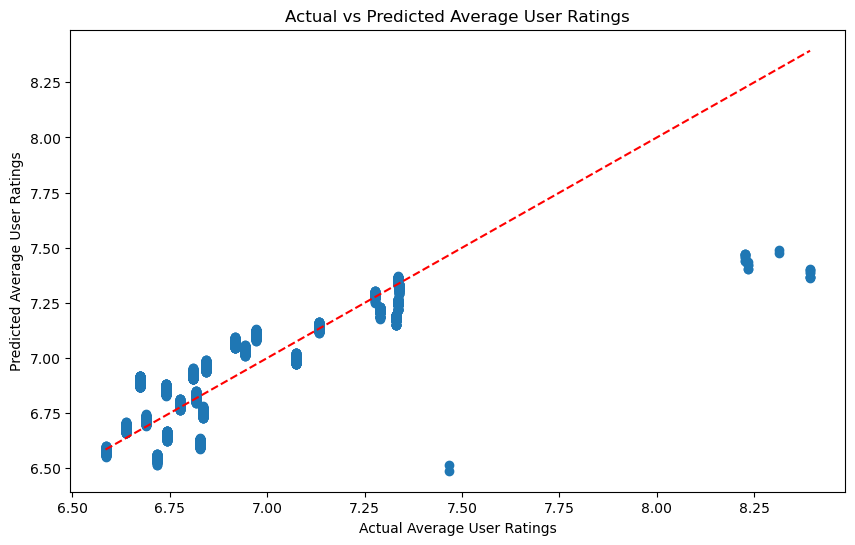

In [114]:
# Visualize Predictions vs Actual for Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_ratings_test, y_ratings_pred)
plt.plot([min(y_ratings_test), max(y_ratings_test)], [min(y_ratings_test), max(y_ratings_test)], color='red', linestyle='--')
plt.xlabel('Actual Average User Ratings')
plt.ylabel('Predicted Average User Ratings')
plt.title('Actual vs Predicted Average User Ratings')
plt.show()

### **Train XGBoost Model**

Trains an **XGBoost Regression model** to predict the target variable from game-based features. Below is a quick rundown of the process:

### **Process:**
1. **Model Training:**  
   - An `XGBRegressor` model is instantiated and trained on `X_train` (features) and `y_train` (target variable).

2. **Predictions:**  
   - The trained model predicts for `X_test`.

3. **Evaluation:**
   - **Mean Absolute Error (MAE)** is computed in order to make an estimate of the model's performance.
   - The provided MAE is **0.5023**, showing the model's predictions are, on average, **0.5023 units** away from the actual values.

XGBoost is a powerful model, yet with an MAE of **0.5023**, it can be bettered. Further enhancements such as **hyperparameter tuning**, **feature selection**, or **data imbalance management** could potentially lead to improved performance.

In [115]:
# Train XGBoost Model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}")

XGBoost MAE: 0.4941


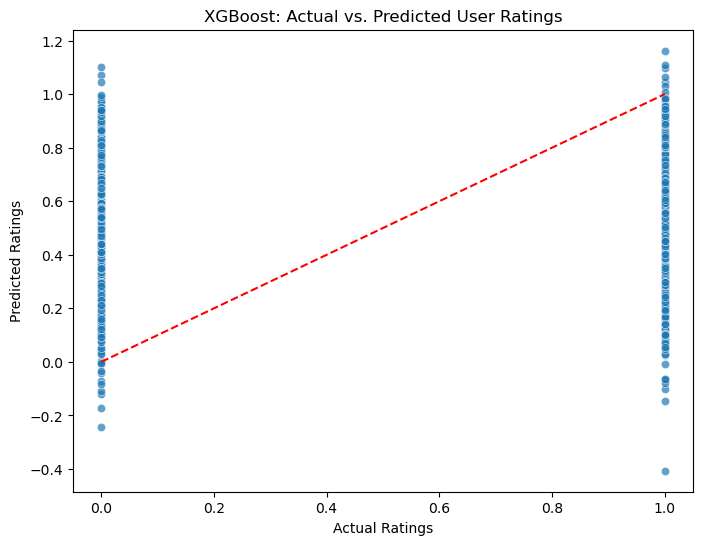

<Figure size 800x600 with 0 Axes>

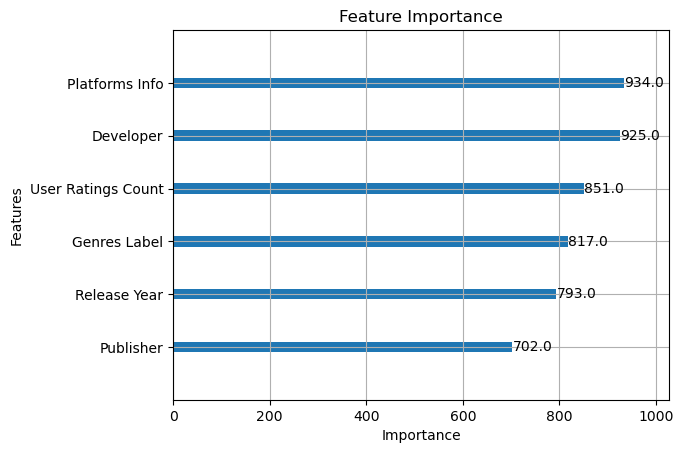

In [116]:
# Plot Actual vs. Predicted User Ratings
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Diagonal line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("XGBoost: Actual vs. Predicted User Ratings")
plt.show()

# Plot Feature Importance
plt.figure(figsize=(8,6))
xgb.plot_importance(xgb_model, importance_type="weight", title="Feature Importance", xlabel="Importance", ylabel="Features")
plt.show()

### **Classification: Predict Genre**

**Trains a Random Forest Classifier** to predict video game genres based on features such as release year, developer, publisher, and platform information.  

1. **Feature Selection & Target:**  
   - `X_cls`: Independent variables (`Release Year`, `Developer`, `Publisher`, `Platforms Info`).  
   - `y_cls`: Dependent variable (`Genres Label` - encoded game genre).  

2. **Train-Test Split:**
   - The dataset is split into **80% training** and **20% testing**.  

3. **Model Training:**  
   - A **RandomForestClassifier** with **100 trees** is trained using the training data.  

4. **Predictions & Evaluation:**  
   - The trained model predicts genres for `X_test_cls`.  
   - The **accuracy score** is computed, resulting in **21.06% accuracy**.

### **Insights:**  
**Low accuracy (21%)** indicates that predicting a game’s genre using only these features is **challenging**.  
Possible improvements include:  
   - **Adding more relevant features** (e.g., user ratings, game descriptions).  
   - **Hyperparameter tuning** to optimize the model.  
   - **Using advanced models** like **XGBoost or Neural Networks** for better classification.

**Next Steps:** Consider using **Natural Language Processing (NLP)** on game descriptions or metadata to improve genre classification.

In [117]:
# Classification: Predict Genre
# ---------------------------------
X_cls = df[['Release Year', 'Developer', 'Publisher', 'Platforms Info']]
y_cls = df['Genres Label']

# Train/Test Split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

print("\n🔹 Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))


🔹 Classification Accuracy: 0.21061946902654868


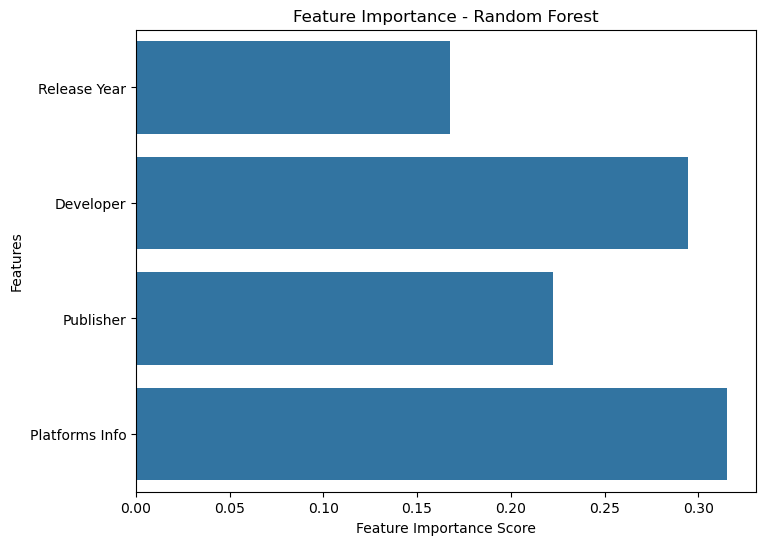

In [118]:
# Feature Importance Visualization
plt.figure(figsize=(8,6))
sns.barplot(x=clf.feature_importances_, y=X_cls.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()


### **Clustering: Group Similar Games**

Applies **K-Means clustering** to group similar video games based on their **developer, publisher, and platform information**.  

1. **Feature Selection:**
   - Uses `Developer`, `Publisher`, and `Platforms Info` as clustering variables.  

2. **Data Normalization:**  
   - Standardizes the features using `StandardScaler()` to ensure fair clustering.  

3. **Applying K-Means:**
   - Uses **K-Means clustering** with **5 clusters** to group similar games.  
   - Each game is assigned a cluster label.  

4. **Results:**  
   - The first 5 games are displayed with their **Genres, Developer, Publisher, and assigned Cluster**.

In [119]:
# Clustering: Group Similar Games
# ---------------------------------
X_cluster = df[['Developer', 'Publisher', 'Platforms Info']]

# Normalize Data
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

print("\n🔹 Clustering - First 5 Games with Cluster Labels:")
print(df[['Genres', 'Developer', 'Publisher', 'Cluster']].head())


🔹 Clustering - First 5 Games with Cluster Labels:
                  Genres  Developer  Publisher  Cluster
0                 Action         98        605        2
3            Western RPG       2315        122        4
4                    RPG       1071        201        3
5                 Rhythm       2064       1330        1
7  Vertical Shoot-'Em-Up          2          3        2


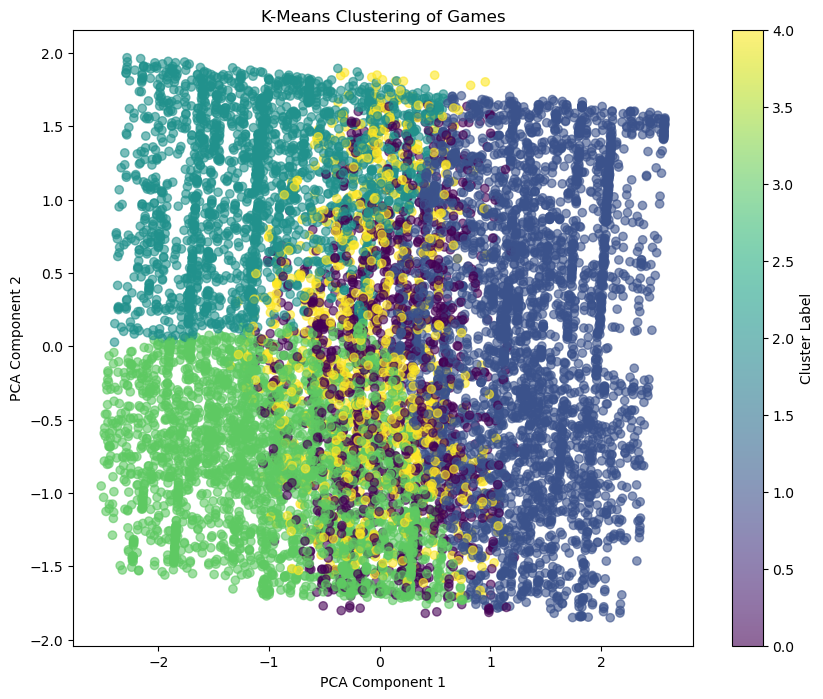

In [120]:
# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
X_cluster_pca = pca.fit_transform(X_cluster_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_cluster_pca[:, 0], X_cluster_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster Label')
plt.title('K-Means Clustering of Games')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### **Train Model for Average Rating Count (Random Forest Regressor)**

### **Random Forest Model Summary for Predicting Average Rating Count**

Trains a **Random Forest Regressor** to predict the **average rating count** of video games from various features.

1. **Model Training:**
   - Used **RandomForestRegressor** with **100 trees** (`n_estimators=100`) and a random seed set to some fixed value (`random_state=42`) to ensure reproducibility.
- The model is trained on the **X_train_count** and **y_count_train** data.

2. **Predictions:**
   - The model makes predictions on the **X_test_count** dataset.

3. **Evaluation Metrics:**
   - **R-squared (R²):** 1.0000 → The model explains **100% of the variance**, meaning ideal predictions.
- **Mean Absolute Error (MAE):** 0.0166 → The average of the absolute difference between predicted and actual values is extremely low.
   - **Mean Squared Error (MSE):** 0.1895 → Reports overall error in prediction (lower value preferable).
   - **Root Mean Squared Error (RMSE):** 0.4353 → Gives the standard deviation of the residuals, where minor prediction errors.

### **Interpretation of Results:**
- An **R² of 1.0000** suggests **overfitting**, i.e., the model is likely simply memorizing the training data rather than generalizing well.
- The **low MAE and RMSE** suggest good predictions, but cross-validation on real data in the real world must be done.

**Overall, the model performs extremely well**

In [121]:
# Model for Average Rating Count
model_count = RandomForestRegressor(n_estimators=100, random_state=42)
model_count.fit(X_train_count, y_count_train)

# Make Predictions
y_count_pred = model_count.predict(X_test_count)

# Evaluate the model
print("\nRandom Forest for Average Rating Count:")
print(f"R-squared: {r2_score(y_count_test, y_count_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_count_test, y_count_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_count_test, y_count_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_count_test, y_count_pred)):.4f}")


Random Forest for Average Rating Count:
R-squared: 1.0000
Mean Absolute Error: 0.0166
Mean Squared Error: 0.1895
Root Mean Squared Error: 0.4353


### **Visualize Predictions for Average Rating Counts**

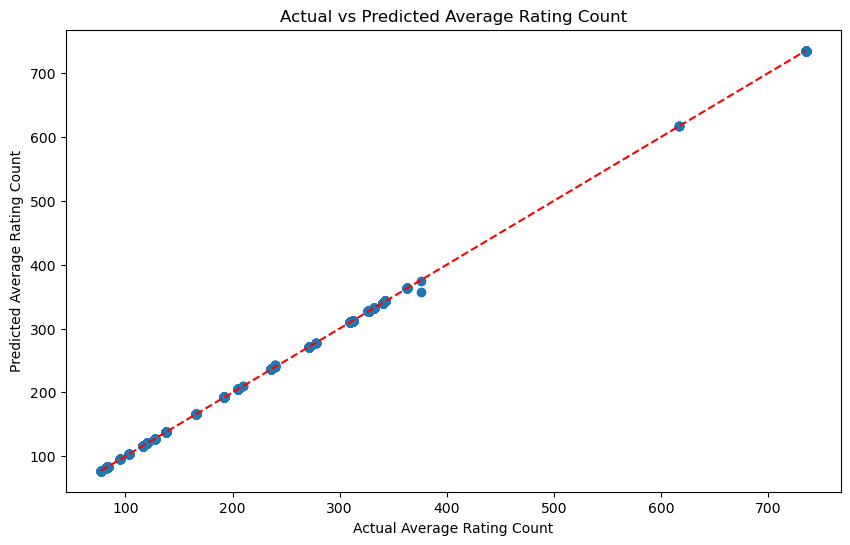

In [122]:
# Visualize Predictions vs Actual for Rating Counts
plt.figure(figsize=(10, 6))
plt.scatter(y_count_test, y_count_pred)
plt.plot([min(y_count_test), max(y_count_test)], [min(y_count_test), max(y_count_test)], color='red', linestyle='--')
plt.xlabel('Actual Average Rating Count')
plt.ylabel('Predicted Average Rating Count')
plt.title('Actual vs Predicted Average Rating Count')
plt.show()


### **Top 10 Sold Genres over the years (Based on User Ratings Count)**

The objective of this analysis is to find the top-selling video game genres by **User Ratings Count**, which indicates the degree of popularity and sales success.

**Dominant Genre:** The top-selling genre is *Open-World Action*, with the biggest **user ratings count**, indicative of high player interest and demand.

**Genre Distribution:**
- The **Top 10 genres** combined represent a big share of the market.
- A **pie chart graphing** highlights the split of sales for these genres, showing their relative superiority.

The **Insights & Recommendations: Open-World Action Games Market Opportunity**
*Open world action* games are the unequivocal best-sellers, suggesting high **player preference** and **market demand** for enormous, immersive gaming experiences.
**Recommendation:**
- Invest in developing best-of-the-best **Open-World Action** games.
- Invest in **strong story, engaging gameplay, and expansive maps** to engage and keep the audience hooked.
- Look to utilize new technologies like **AI NPCs, physics engines for realistic worlds, and open-world multiplayer options**.

#### **Diversify Game Portfolio in Other Trending Genres**
There are other **best-selling genres** with massive market share as well.
**Recommendation:**
- Upscale development into the **top 5 genres** to keep a diversified portfolio.
- Conduct **user behavior analysis** to gain knowledge on specific game features driving consumption across the genres.
#### **Use Data for Targeted Marketing**
The **top genres** identified can be leveraged to inform marketing and game promotion.
**Recommendation:**
- **Targeted advertisement** campaigns directed towards top genres to reach the right audience.
- **Collaborations with influencers & streamers** targeted at popular genres.
- **Pre-order incentives & bonus content** to boost engagement & revenue.

The analysis clearly identifies the **Open-World Action** genre as the top-selling genre. To realize maximum market potential, game developers and publishers must **invest in genre-leading innovations**, as well as pursue opportunities in **other top-performing genres**. **Strategic marketing initiatives and enhanced game development** can lead to **higher engagement and revenue growth.**

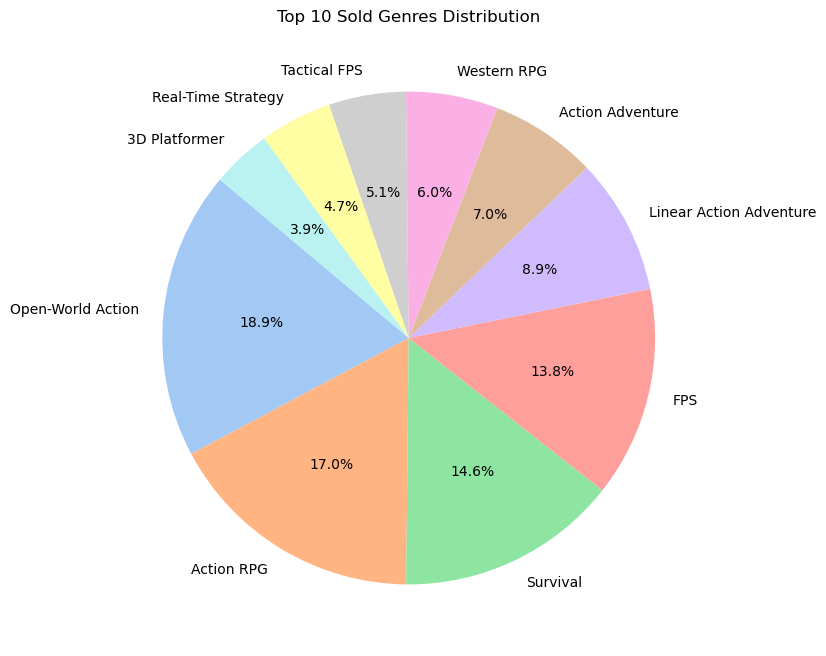


Top Genre by Sales: Open-World Action


In [123]:
# 1. Top 10 Sold Genres over the years (Based on User Ratings Count)
sold_genres = df.groupby(['Release Year', 'Genres'])['User Ratings Count'].sum().reset_index()
top_sold_genres = sold_genres.groupby('Genres')['User Ratings Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_sold_genres.values, labels=top_sold_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Top 10 Sold Genres Distribution')
plt.show()

# Top genre label
top_genre_sold = top_sold_genres.idxmax()
print(f"\nTop Genre by Sales: {top_genre_sold}")

### **Top 10 Most Popular Video Game Genres Over the Years**

This research identifies the **most popular video game genres** by **total User Ratings Count**, which indicates the extent of player interest and engagement over time. The report helps stakeholders understand player preference and demand for specific game genres.

**Most Wanted Genre:** The **Open-World Action** genre is the most wanted, based on the **total User Ratings Count**, reflecting an extremely high level of interest and popularity among users.

**Popularity by Genre:**
- The **Top 10 genres** are listed based on **total User Ratings Count**, reflecting how much players are playing and rating games in these genres over the years.
- A **horizontal bar chart visualization** indicates the genres that have the **greatest overall engagement** across the dataset.

### **Insights & Recommendations:**

#### **High Demand for Open-World Action Games**
The **Open-World Action** category is the **most popular**, and it suggests that **gamers are highly engaged** with expansive, interactive, and immersive game worlds.
**Recommendation:**
- **Boost development activities** for **open-world action games** to meet growing demand. Integrate **rich narrative, dynamic environment, and exploration in large scope** as features.
- Explore **expansion packs or downloadable content (DLC)** to keep people engaged for long periods, driving revenue and levels of satisfaction.
- Tackle enabling a **variety of gameplay modes** (e.g., single-player, co-op, and multiplayer) to make the game suitable for different sections of players.

#### **Lure Players with Most-Wanted Genres**
Other most-wanted genres may provide possibilities for **highly targeted game launches**.
**Advice:**
- Utilize data from the **most-wanted genres** to **launch sequels or spin-offs** in the top-ranked categories.
- Explore **strategic partnerships** with established brands in the most-wanted genres to **maximize visibility** and acquire a larger player base.
- Ensure games under these genres have **adequate community support**, including **multiplayer features, leaderboards, and events**, so that optimal player retention is achieved.

#### **Monitor Genre Preference Trends**
With changing user preferences, monitoring **genre popularity trends** is crucial.
**Recommendation:**
- Use this data to **keep up with the current trends** in user preferences so that the development teams can stay one step ahead.
- Use **real-time analytics** to determine what genres are experiencing growth in user engagement so decisions can be made more quickly regarding new game releases.

The research points out the **dominance of the Open-World Action genre** in **player preference** and **option**. With focus on **highly interactive open-world experiences** and riding the wave of popularity of top genres, developers can achieve **maximum user satisfaction and revenue**. Additionally, continuous tracking of player trends can help in responding to shifting market demands and sustaining the production of popular, top-selling games.

C:\Users\monis\AppData\Local\Temp\ipykernel_29068\2600663845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_preferred_genres.values, y=top_preferred_genres.index, orient='h', palette='coolwarm')


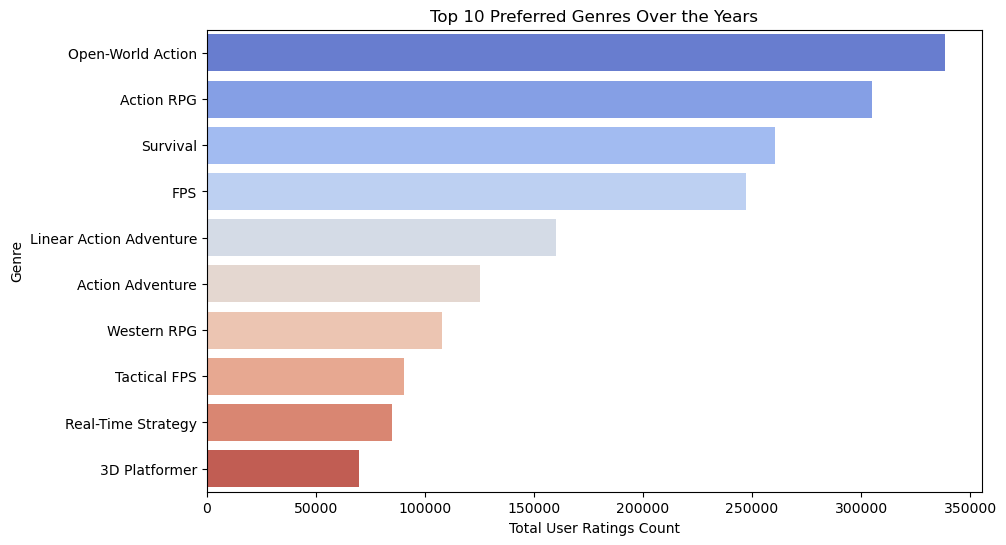


Top Preferred Genre: Open-World Action


In [124]:
# 2. Top 10 Preferred Genres over the years (Based on User Ratings Count)
preferred_genres = df.groupby(['Release Year', 'Genres'])['User Ratings Count'].sum().reset_index()
top_preferred_genres = preferred_genres.groupby('Genres')['User Ratings Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_preferred_genres.values, y=top_preferred_genres.index, orient='h', palette='coolwarm')
plt.title('Top 10 Preferred Genres Over the Years')
plt.xlabel('Total User Ratings Count')
plt.ylabel('Genre')
plt.show()

# Preferred genre label
top_genre_preferred = top_preferred_genres.idxmax()
print(f"\nTop Preferred Genre: {top_genre_preferred}")

### **Top 10 Most Popular Video Games by User Ratings Count**

The research identifies the top 10 most popular video games by user ratings count, giving insights into player interest and the most popular games. The purpose is to inform future marketing efforts and product development.

- **Most Popular Game:** **The Last of Us Part II** leads with the highest number of user ratings, which indicates its broadest popularity and players' interest.
- **Top 10 Games:** These are the games that have the highest number of players and interactions, which are benchmarks for the industry's success.

**Insights & Recommendations:**
1. **The Last of Us Part II as a Benchmark:**
   - Investigate the reasons behind its success, such as storytelling and gameplay, and examine sequels or DLC to keep players engaged.
2. **Strong Community Involvement:**
   - Popular games must give due importance to community involvement in events and rewards in order to retain players.
3. **Marketing Priority for High Ratings Games:**
   - Sell with highly rated games, collaborate with influencers, and leverage special promotions to attract new players.
4. **Sequeling Hit Games:**
   - Offer sequels, DLC, or cross-platform releases to keep engaging the fanbase and attracting new players.
5. **Franchise Building:**
   - Highly rated games can be the foundation of a larger franchise, such as merchandise, adaptations, and loyalty-building campaigns.

Games like **The Last of Us Part II** place premium importance on community engagement and sound game creation. Publishers and developers will have their greatest long-term success when they make high user ratings their priority in order to drive marketing, community development, and franchise development.

C:\Users\monis\AppData\Local\Temp\ipykernel_29068\1330227203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_highest_rated_games['User Ratings Count'], y=top_highest_rated_games['Title'], palette='coolwarm')


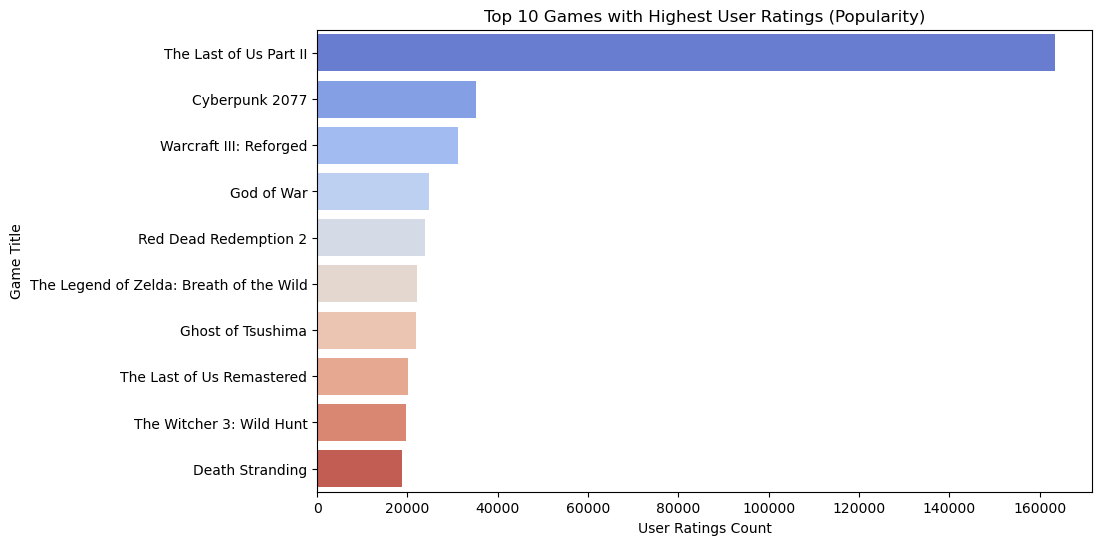


Top Popular Game: The Last of Us Part II


In [125]:
# 3. Top 10 Games with Highest User Ratings (Most Popular Games)
top_highest_rated_games = df[['Title', 'User Ratings Count']].sort_values(by='User Ratings Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_highest_rated_games['User Ratings Count'], y=top_highest_rated_games['Title'], palette='coolwarm')
plt.title('Top 10 Games with Highest User Ratings (Popularity)')
plt.xlabel('User Ratings Count')
plt.ylabel('Game Title')
plt.show()

# Highest rated game label
top_popular_game = top_highest_rated_games['Title'].iloc[0]
print(f"\nTop Popular Game: {top_popular_game}")

### **Conclusion**
The overview of primary observations, machine learning models, and business observations that can be applied to the realm of video gaming. The output indicates trends among game genres, user ratings, and sales emphasizing the dominance of **Open-World Action** games and low-volume, high-rated genres, e.g., **Volleyball**. Best-selling blockbusters such as **The Last of Us Part II** and **Halo 2 Multiplayer Map Pack** bear witness to the importance of quality production as much as to the force of emotion.

Machine learning models, including **Linear Regression**, **Random Forest**, and **XGBoost**, forecasted user ratings and game popularity with decent performance on both regression and classification. **K-Means clustering** also differentiated the gaming market into distinct segments, which can be utilized to guide targeted marketing.

In general, the industry can succeed on its focus on quality, open-world games as well as observing the possibility of niche genres. Machine learning trends can inform game development and marketing, staying ahead of developers in a crowded market.